## **Santa Dataset with VGG16 & SGD Optimizer**

**Benedictus Bayu Pramudhito**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/My\ Drive/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [5]:
dataset_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_augmented_iteration = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(224, 224))
test_augmented_iteration = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(224, 224))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout

In [9]:
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = SGD(learning_rate=0.0001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
history_model = fine_tuned_model.fit_generator(train_augmented_iteration, steps_per_epoch=len(train_augmented_iteration), validation_data=test_augmented_iteration, validation_steps=len(test_augmented_iteration), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
6/6 [==============================] - 24s 4s/step - loss: 0.7598 - accuracy: 0.5106 - val_loss: 0.7064 - val_accuracy: 0.4731
Epoch 2/50
6/6 [==============================] - 20s 3s/step - loss: 0.7647 - accuracy: 0.5045 - val_loss: 0.6442 - val_accuracy: 0.6423
Epoch 3/50
6/6 [==============================] - 22s 4s/step - loss: 0.6950 - accuracy: 0.5891 - val_loss: 0.5893 - val_accuracy: 0.7423
Epoch 4/50
6/6 [==============================] - 19s 3s/step - loss: 0.6210 - accuracy: 0.6450 - val_loss: 0.5320 - val_accuracy: 0.8308
Epoch 5/50
6/6 [==============================] - 22s 4s/step - loss: 0.5768 - accuracy: 0.7009 - val_loss: 0.4874 - val_accuracy: 0.8692
Epoch 6/50
6/6 [==============================] - 19s 3s/step - loss: 0.4852 - accuracy: 0.7900 - val_loss: 0.4503 - val_accuracy: 0.9077
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 0.4749 - accuracy: 0.8097 

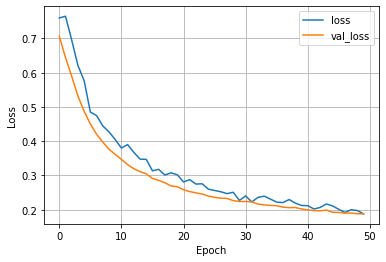

In [11]:
plot_loss(history_model)

In [12]:
import pandas as pd

history_dataframe = pd.DataFrame(history_model.history)
history_dataframe['epoch'] = history_model.epoch

In [13]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
49,0.187866,0.935045,0.188225,0.950000,49
48,0.197519,0.935045,0.188489,0.950000,48
46,0.192174,0.944109,0.190231,0.950000,46
47,0.200321,0.925982,0.190323,0.950000,47
45,0.201180,0.935045,0.192122,0.950000,45
44,0.211145,0.921450,0.192596,0.950000,44
42,0.206710,0.932024,0.196840,0.946154,42
41,0.202241,0.938066,0.197572,0.950000,41
43,0.216868,0.924471,0.199137,0.950000,43
40,0.211906,0.927492,0.199638,0.946154,40


In [15]:
history_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
49,0.187866,0.935045,0.188225,0.950000,49
41,0.202241,0.938066,0.197572,0.950000,41
23,0.275746,0.913897,0.245969,0.950000,23
30,0.240422,0.915408,0.224257,0.950000,30
31,0.222800,0.930514,0.222851,0.950000,31
26,0.252552,0.919940,0.233793,0.950000,26
38,0.219350,0.922961,0.206666,0.950000,38
37,0.229842,0.912387,0.206060,0.950000,37
27,0.247033,0.924471,0.233042,0.950000,27
43,0.216868,0.924471,0.199137,0.950000,43


**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Nilai val_accuracy tertinggi pada model berada pada epoch 46 hingga 50 yaitu sebesar 0.95 akan tetapi kita harus tinjau juga berdasarkan val_lossnya. Berdasarkan grafik epoch terhadap loss pada arsitektur CNN dengan vgg16 dan image augmentation dengan optimizer SGD, terlihat bahwa garis loss dan val_loss nya terus menurun dengan 50 epoch. Terlihat adanya perbedaan jarak antara loss dan val_lossnya dengan 50 epoch yang kecil yang berarti model yang kita buat ini bagus. Nilai val_loss terendah diperoleh saat epochnya sekitar 50, dimana diperoleh val_loss: 0.1882 dan val_accuracy: 0.95